# Football Data Analysis
Analiza Ekstraklasy pod kątem osiąganych wyników w lidze w porównaniu do lig wyżej notowanych w europejskim rankingu UEFA. 
Ligi poddane analizie zostaną: Premier League(TOP 4 UEFA LEAGUE), Liga Portuguesa(TOP 6), Liga Duńska(TOP 15) i Liga Czeska HET(TOP 25)
Aktualnie Polska Ekstraklasa znajduje się na 30 miejscu w rankingu UEFA.
Dane na podst.transfermarkt.pl
The objective of this project was to scrap football data from fbref.com site and realization of analysis process for 5 different leagues in UEFA football federation. Football leagues were selected, by UEFA's rank which determines national football league pots in UEFA qualifications.

In [1]:
#cell 1 - import pandas library
import pandas as pd

In [2]:
#cell 2 - League reflinks for data mining proccess
ekstraklasa = 'https://fbref.com/en/comps/36/Ekstraklasa-Stats'
het_liga = 'https://fbref.com/en/comps/66/Czech-First-League-Stats'
superliga_3f = 'https://fbref.com/en/comps/50/Superliga-Stats'
primeira_liga = 'https://fbref.com/en/comps/32/Primeira-Liga-Stats'
premier_league = 'https://fbref.com/en/comps/9/Premier-League-Stats'

In [3]:
#cell 3 - Load league tables and declare dataset for ekstrklasa league
league_table = pd.read_html(ekstraklasa)

In [4]:
#cell 4 - extract two league tables included in given reflink
df_overall = league_table[0]
df_statistical = league_table[1]
df_statistical.head(10)

Unnamed: 0_level_0 Unnamed: 1_level_0 Home                                \
                  Rk              Squad   MP  W  D  L  GF  GA GD Pts Pts/G   
0                  1       Legia Warsaw   10  6  1  3  21  15  6  19  1.90   
1                  2     Pogoń Szczecin    9  5  4  0  11   3  8  19  2.11   
2                  3          RKS Raków   10  6  1  3  13   8  5  19  1.90   
3                  4      Lechia Gdańsk   10  4  1  5  15  13  2  13  1.30   
4                  5      Śląsk Wrocław    9  6  3  0  15   7  8  21  2.33   
5                  6      Górnik Zabrze   10  4  2  4  15  14  1  14  1.40   
6                  7     Zagłębie Lubin    9  4  3  2  12  10  2  15  1.67   
7                  8        Jagiellonia    9  4  3  2  16  12  4  15  1.67   
8                  9        Lech Poznań    9  3  4  2  12  11  1  13  1.44   
9                 10      Piast Gliwice    9  2  3  4   8  10 -2   9  1.00   

  Away                                
    MP  W  D  L  GF  GA GD Pts Pts/G  
0    9  6  2  1  12   5  7  20  2.22  
1   10  5  1  4  13   9  4  16  1.60  
2    9  4  3  2  17  12  5  15  1.67  
3    9  5  1  3  10   9  1  16  1.78  
4   10  2  1  7   9  13 -4   7  0.70  
5    9  4  1  4   8   8  0  13  1.44  
6   10  3  2  5  11  12 -1  11  1.10  
7   10  3  1  6  10  17 -7  10  1.00  
8   10  3  3  4  15  14  1  12  1.20  
9   10  4  3  3  16  12  4  15  1.50

In [6]:
#cell 5 - extract single column rows from dataset
df_statistical['Home']['Pts/G']

0     1.90
1     2.11
2     1.90
3     1.30
4     2.33
5     1.40
6     1.67
7     1.67
8     1.44
9     1.00
10    1.00
11    1.11
12    1.10
13    1.30
14    1.40
15    1.00
Name: Pts/G, dtype: float64

In [7]:
#cell 6 - create new dataset and fill data from df_statistical 
df_new_statistical = df_statistical[['Home','Away']]
df_home_statistical= df_new_statistical['Home']['Pts/G']
df_away_statistical= df_new_statistical['Away']['Pts/G']
df_new_statistical = pd.concat([df_home_statistical,df_away_statistical],axis=1)
df_new_statistical.columns = ['HomePointRatio', 'AwayPointRatio']
df_new_statistical.head()

,HomePointRatio,AwayPointRatio
0,1.90,2.22
1,2.11,1.60
2,1.90,1.67
3,1.30,1.78
4,2.33,0.70


In [8]:
#cell 7 - usage of pandas concat function, for concatenation of two different dataframes
df_overall = pd.concat([df_overall, df_new_statistical], axis=1)

#delete goal_ratio and point_ratio
#df_overall.drop(['Goal_ratio', 'Point_ratio'],axis=1)
df_overall.head(15)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes,HomePointRatio,AwayPointRatio
0,1,Legia Warsaw,19,12,3,4,33,20,13,39,L W D W W,2100,Tomáš Pekhart - 15,Artur Boruc,NaN,1.90,2.22
1,2,Pogoń Szczecin,19,10,5,4,24,12,12,35,W W D L L,411,Alexander Gorgon - 5,Dante Stipica,NaN,2.11,1.60
2,3,RKS Raków,19,10,4,5,30,20,10,34,L L L W W,588,Ivi - 6,Jakub Szumski,NaN,1.90,1.67
3,4,Lechia Gdańsk,19,9,2,8,25,22,3,29,L D W W W,1481,Flávio Paixão - 8,Dušan Kuciak,NaN,1.30,1.78
4,5,Śląsk Wrocław,19,8,4,7,24,20,4,28,D L D L W,2904,"Róbert Pich, Erik Expósito - 5",Matúš Putnocký,NaN,2.33,0.70
5,6,Górnik Zabrze,19,8,3,8,23,22,1,27,D L W L L,3348,Jesús Jiménez - 9,Martin Chudý,NaN,1.40,1.44
6,7,Zagłębie Lubin,19,7,5,7,23,22,1,26,L D L L W,1319,Lorenco Šimić - 4,Dominik Hładun,NaN,1.67,1.10
7,8,Jagiellonia,19,7,4,8,26,29,-3,25,W L D D L,2002,Jesús Imaz - 10,Pāvels Šteinbors,NaN,1.67,1.00
8,9,Lech Poznań,19,6,7,6,27,25,2,25,D D L W W,2864,Mikael Ishak - 7,Filip Bednarek,NaN,1.44,1.20
9,10,Piast Gliwice,19,6,6,7,24,22,2,24,W W D L W,938,Jakub Świerczok - 8,František Plach,NaN,1.00,1.50


In [3]:
# cell 8 - python function to calculate ratio of each teams in given dataset
def calculate_ratio(column,stat):
    if not (
        'MP' in column
    ):
        print('Dataset does not contain this type of data or container does not exist')
        return 
    else :
        if not(
            stat in  column
        ):
            print('Given statistical column does not exists')
        else :
            return round(column[stat]/column['MP'],2)
            
        

In [4]:
#cell 9 - import urllib 
import urllib

In [5]:
#cell 10 - function creating dataset of given link as a function's argument
def create_dataset(href):
    try:
        league_table = pd.read_html(href)
    except urllib.error.URLError as e:
        print('Prepared URL does not exist')
        print(e)
        return
        
    try:    
        df_overall = league_table[0]
    except IndexError:
        print('Cannot load overall league table')
        return
    try:
        df_statistical = league_table[1]
    except IndexError:
        print('Could not load statistical league table')
        return
    df_overall['Goal_ratio'] = calculate_ratio(df_overall, 'GF')
    df_overall['Point_ratio'] = calculate_ratio(df_overall, 'Pts') 
    df_overall['GL_ratio'] = calculate_ratio(df_overall, 'GA')
    try:
        df_league_dataset = df_overall[["Squad","GF","Goal_ratio","Point_ratio","GL_ratio", "Top Team Scorer"]]   
        df_new_statistical = df_statistical[['Home', 'Away']]
    except KeyError as e:
        print('{}'.format(e))
        return 
        
    df_home_statistical = df_new_statistical['Home']['Pts/G']
    df_away_statistical = df_new_statistical['Away']['Pts/G']
    df_new_statistical = pd.concat([df_home_statistical, df_away_statistical], axis=1)
    df_new_statistical.columns = ['HomePointRatio', 'AwayPointRatio']
    df_league_dataset = pd.concat([df_league_dataset,df_new_statistical],axis=1)
    return df_league_dataset.head(3)


In [6]:
# cell 11 - example of creating dataset
premier_league_df = create_dataset(premier_league)
premier_league_df.head()

,Squad,GF,Goal_ratio,Point_ratio,GL_ratio,Top Team Scorer,HomePointRatio,AwayPointRatio
0,Manchester City,52,2.00,2.38,0.62,İlkay Gündoğan - 11,2.46,2.31
1,Manchester Utd,53,2.04,1.92,1.23,Bruno Fernandes - 15,1.62,2.23
2,Leicester City,45,1.73,1.88,1.15,Jamie Vardy - 12,1.46,2.31


In [7]:
# cell 12 - e.g
superliga_df = create_dataset(superliga_3f)
czech_league_df = create_dataset(het_liga)
portuguese_df = create_dataset(primeira_liga)
ekstraklasa_df = create_dataset(ekstraklasa)

In [8]:
# cell 13 - import matplotlib
import matplotlib.pyplot as plt

In [9]:
# cell 14 - declare a function, responsible for data visualization using plt.plots
def draw_plot(stat):
    fig = plt.figure()
    for frame in [premier_league_df, superliga_df,czech_league_df,portuguese_df,ekstraklasa_df]:
        try:
            plt.plot(frame['Squad'], frame[stat])
        except KeyError as e:
            print('Given stat does not exists:  {}'.format(e))
            return
        plt.title('{} in five different leagues'.format(stat))
        fig.set_size_inches(20, 14, forward=True)


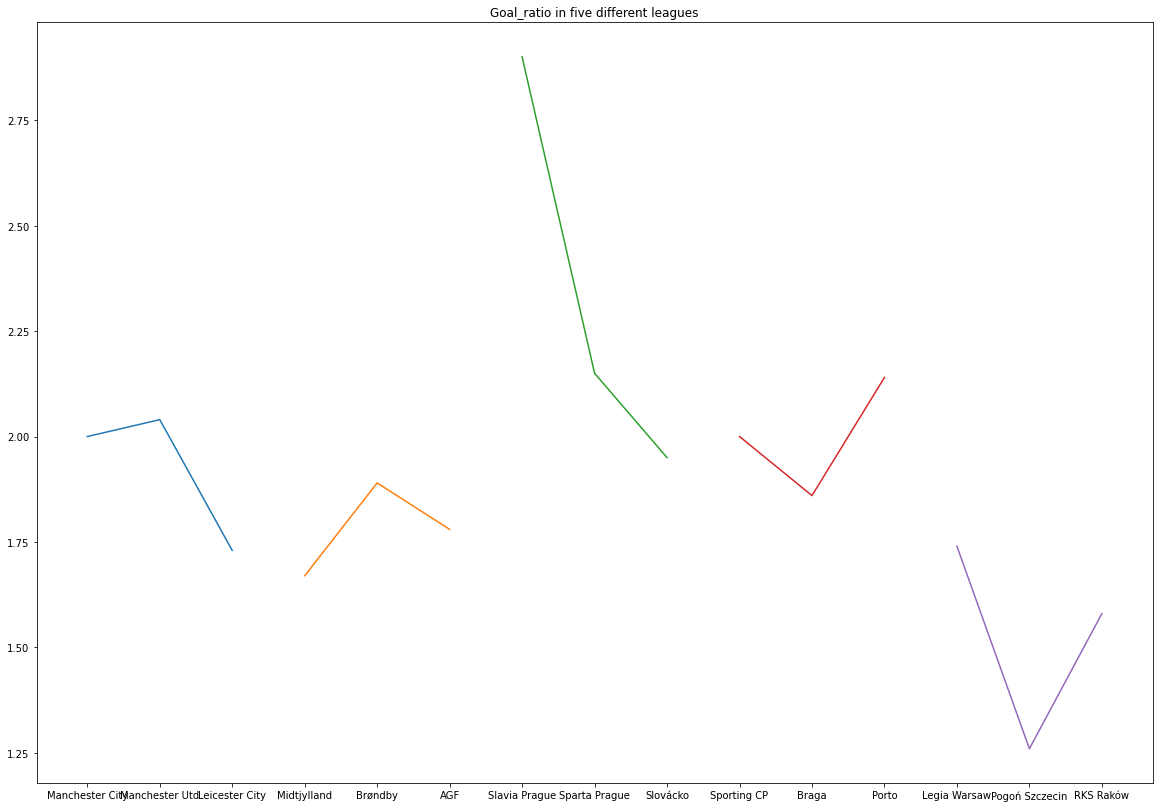

In [10]:
#cell 15 - draw plot for best teams in each leagues according to their goal ratio
draw_plot('Goal_ratio')

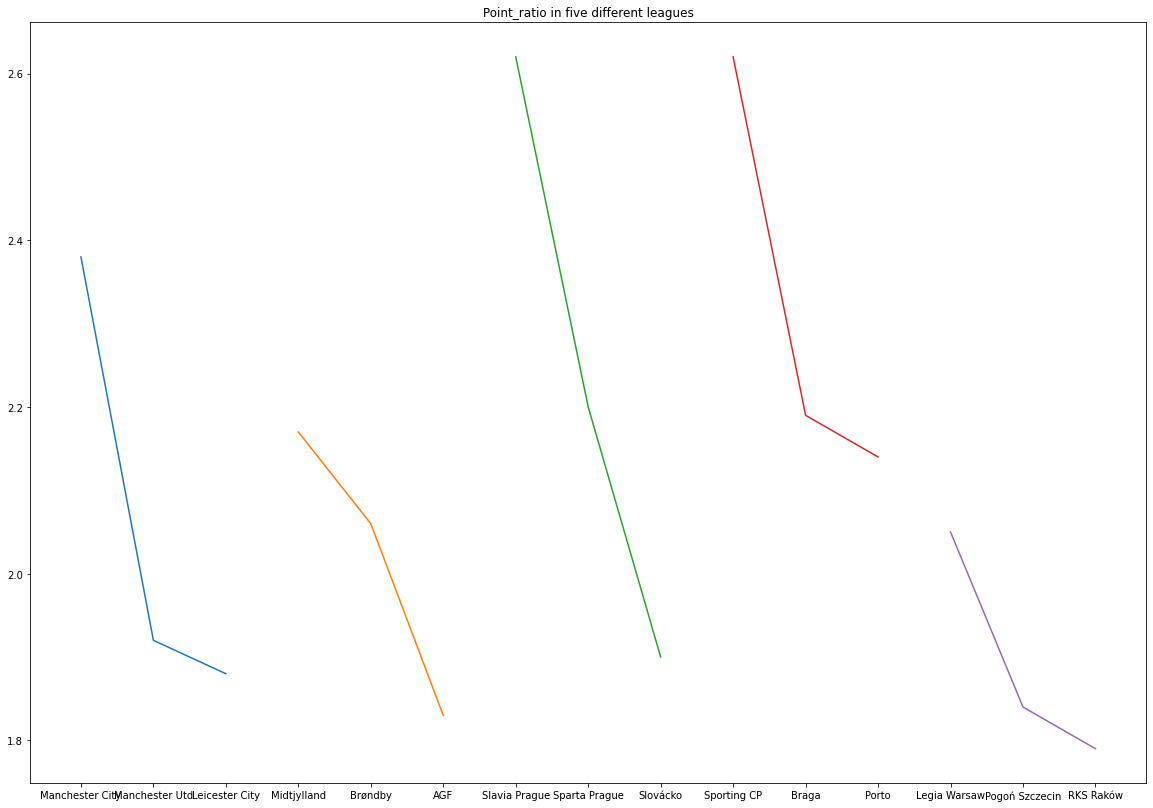

In [11]:
#cell 16 - draw plot for best teams in each leagues according to their point ratio
draw_plot('Point_ratio')

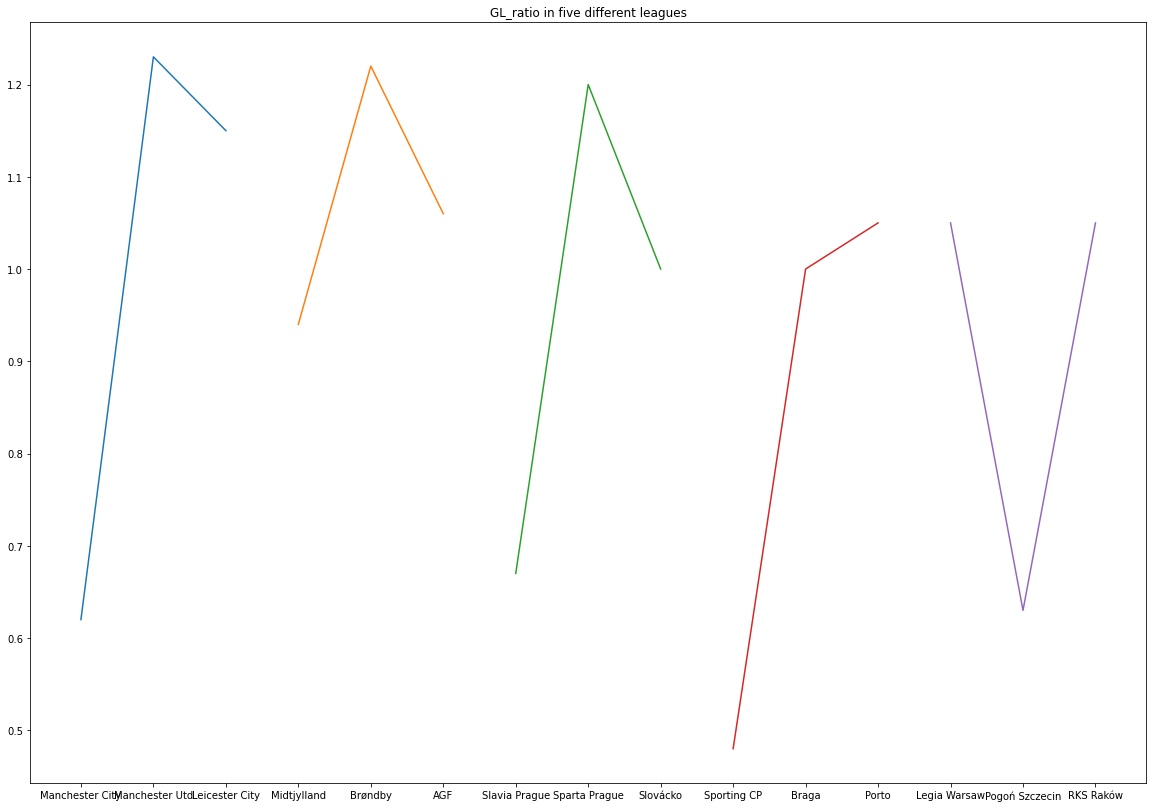

In [12]:
#cell 17 - draw plot for best teams in each leagues according to their goal lost ratio
draw_plot('GL_ratio')

In [20]:
# cell 18 - function responsible for team power calculation
def calculate_team_power(dataset):
    if not(
        'Goal_ratio' in dataset and
        'Point_ratio' in dataset and
        'GL_ratio' in dataset
    ):
        print('Acceptable columns does not exists in dataset')
        return
    else:
        dataset['team_power'] = round((dataset['Goal_ratio'] + dataset['Point_ratio'])/dataset['GL_ratio'],2)
        
    

In [21]:
# cell 19 - initalize team power column in every league dataframe
for frame in [premier_league_df, superliga_df,czech_league_df,portuguese_df,ekstraklasa_df]:
    calculate_team_power(frame)

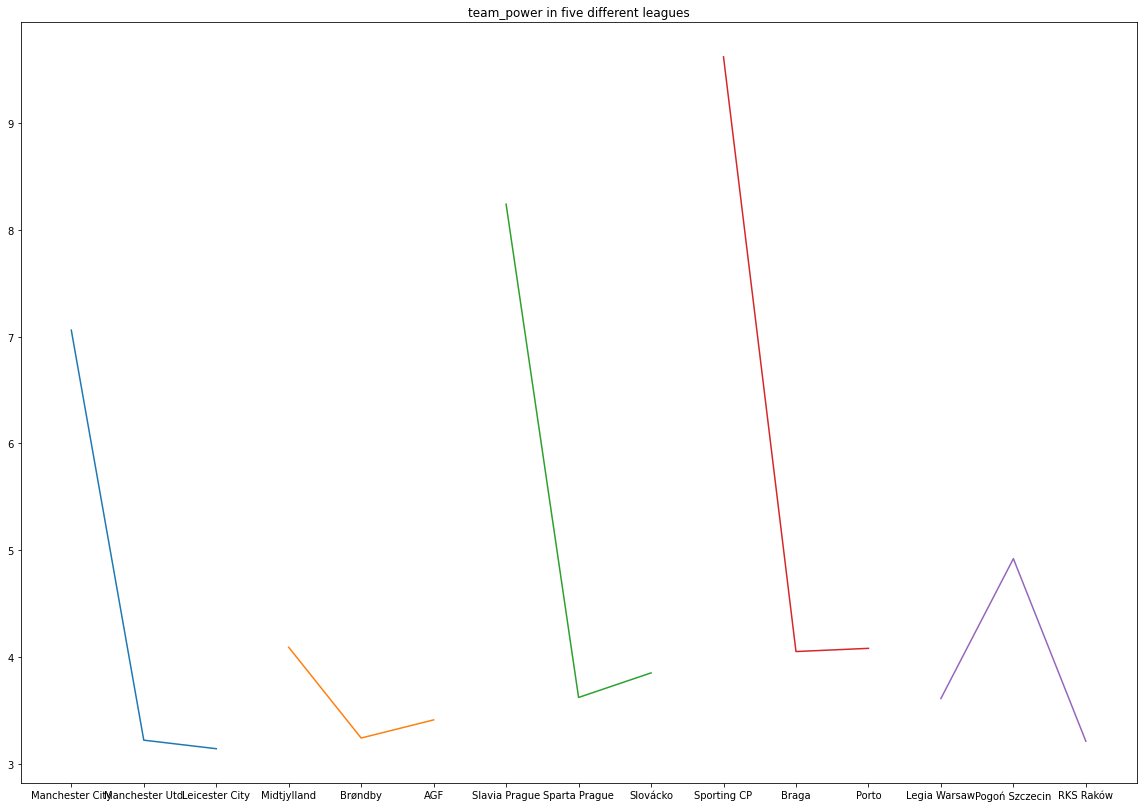

In [22]:
#cell 20 - draw plot for best teams in each leagues according to their team power
draw_plot('team_power')

In [23]:
#cell 21 - initialize new column in dataset, by spliting Top Team Scorer column into Scorer and Goals columns
for frame in [premier_league_df, superliga_df,czech_league_df,portuguese_df,ekstraklasa_df]:
    try:
        new = frame["Top Team Scorer"].str.split("-", n=1, expand=True)
    except KeyError:
        pass
        
    frame['Scorer'] = new[0]
    frame['Goals'] = new[1]
    frame['Scorer/All_Team'] = round(frame['Goals'].astype(int)/frame['GF'],2)
    try:
        frame.drop(columns=["Top Team Scorer"],inplace=True)
    except KeyError:
        print('Table was dropped before')

In [28]:
#cell 21 - display the results of dataframe
ekstraklasa_df.head()

,Squad,GF,Goal_ratio,Point_ratio,GL_ratio,HomePointRatio,AwayPointRatio,team_power,Scorer,Goals,Scorer/All_Team
0,Legia Warsaw,33,1.74,2.05,1.05,1.90,2.22,3.61,Tomáš Pekhart,15,0.45
1,Pogoń Szczecin,24,1.26,1.84,0.63,2.11,1.60,4.92,Alexander Gorgon,5,0.21
2,RKS Raków,30,1.58,1.79,1.05,1.90,1.67,3.21,Ivi,6,0.20


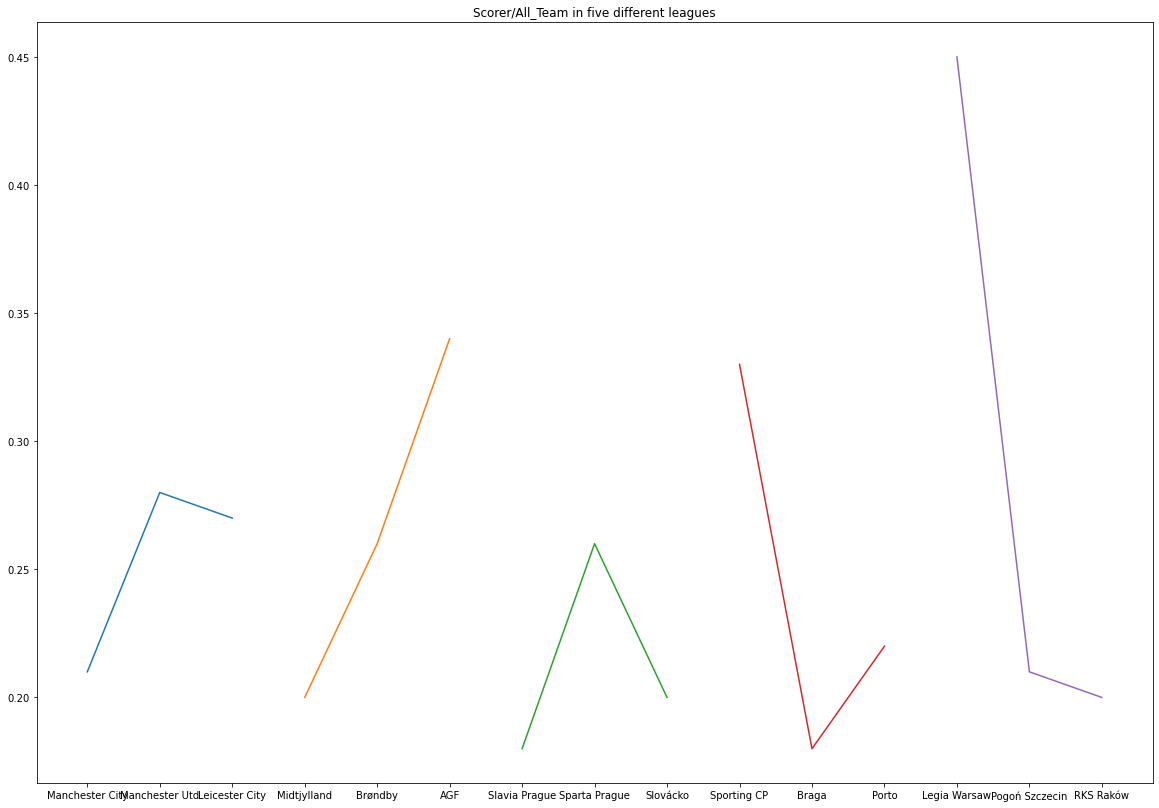

In [29]:
#cell 24 - display dataframe's results as graph
draw_plot('Scorer/All_Team')